# Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D  #para proyecciones en 3D
import ipywidgets as widgets
from IPython.display import display
import missingno as msno

# Cargar DataFrame

In [3]:
file = "../conjunto_de_datos_visita_museos_2018.csv"
df = pd.read_csv(file)
df.head()

,ANIO_ESTAD,ENT_REGIS,MES_ENTREV,DIA_ENTREV,SEXO,EDAD,ENT_RESID,MUN_RESID,PAIS_RESID,NACIONALID,...,OPIN_EXPOS,NIV_APREND,DUR_VIS_H,DUR_VIS_M,REPETIR_VI,RECOMIE_VI,EVAL_GRAL,M_NOVIS_1,M_NOVIS_2,M_NOVIS_3
0,2018,1,7,1,2,23,1,1,0,1,...,2,8.0,0,30,1,12,9,1,2.0,5.0
1,2018,1,7,1,2,36,1,1,0,1,...,1,8.0,0,15,1,14,10,1,NaN,NaN
2,2018,1,7,1,2,23,1,1,0,1,...,2,8.0,0,25,1,12,10,5,6.0,8.0
3,2018,1,7,1,2,35,1,1,0,1,...,2,8.0,0,15,1,12,10,8,NaN,NaN
4,2018,1,7,2,2,22,15,106,0,1,...,1,9.0,0,40,1,15,9,7,NaN,NaN


In [10]:
df.isnull().any().any()

True

<IPython.core.display.Javascript object>


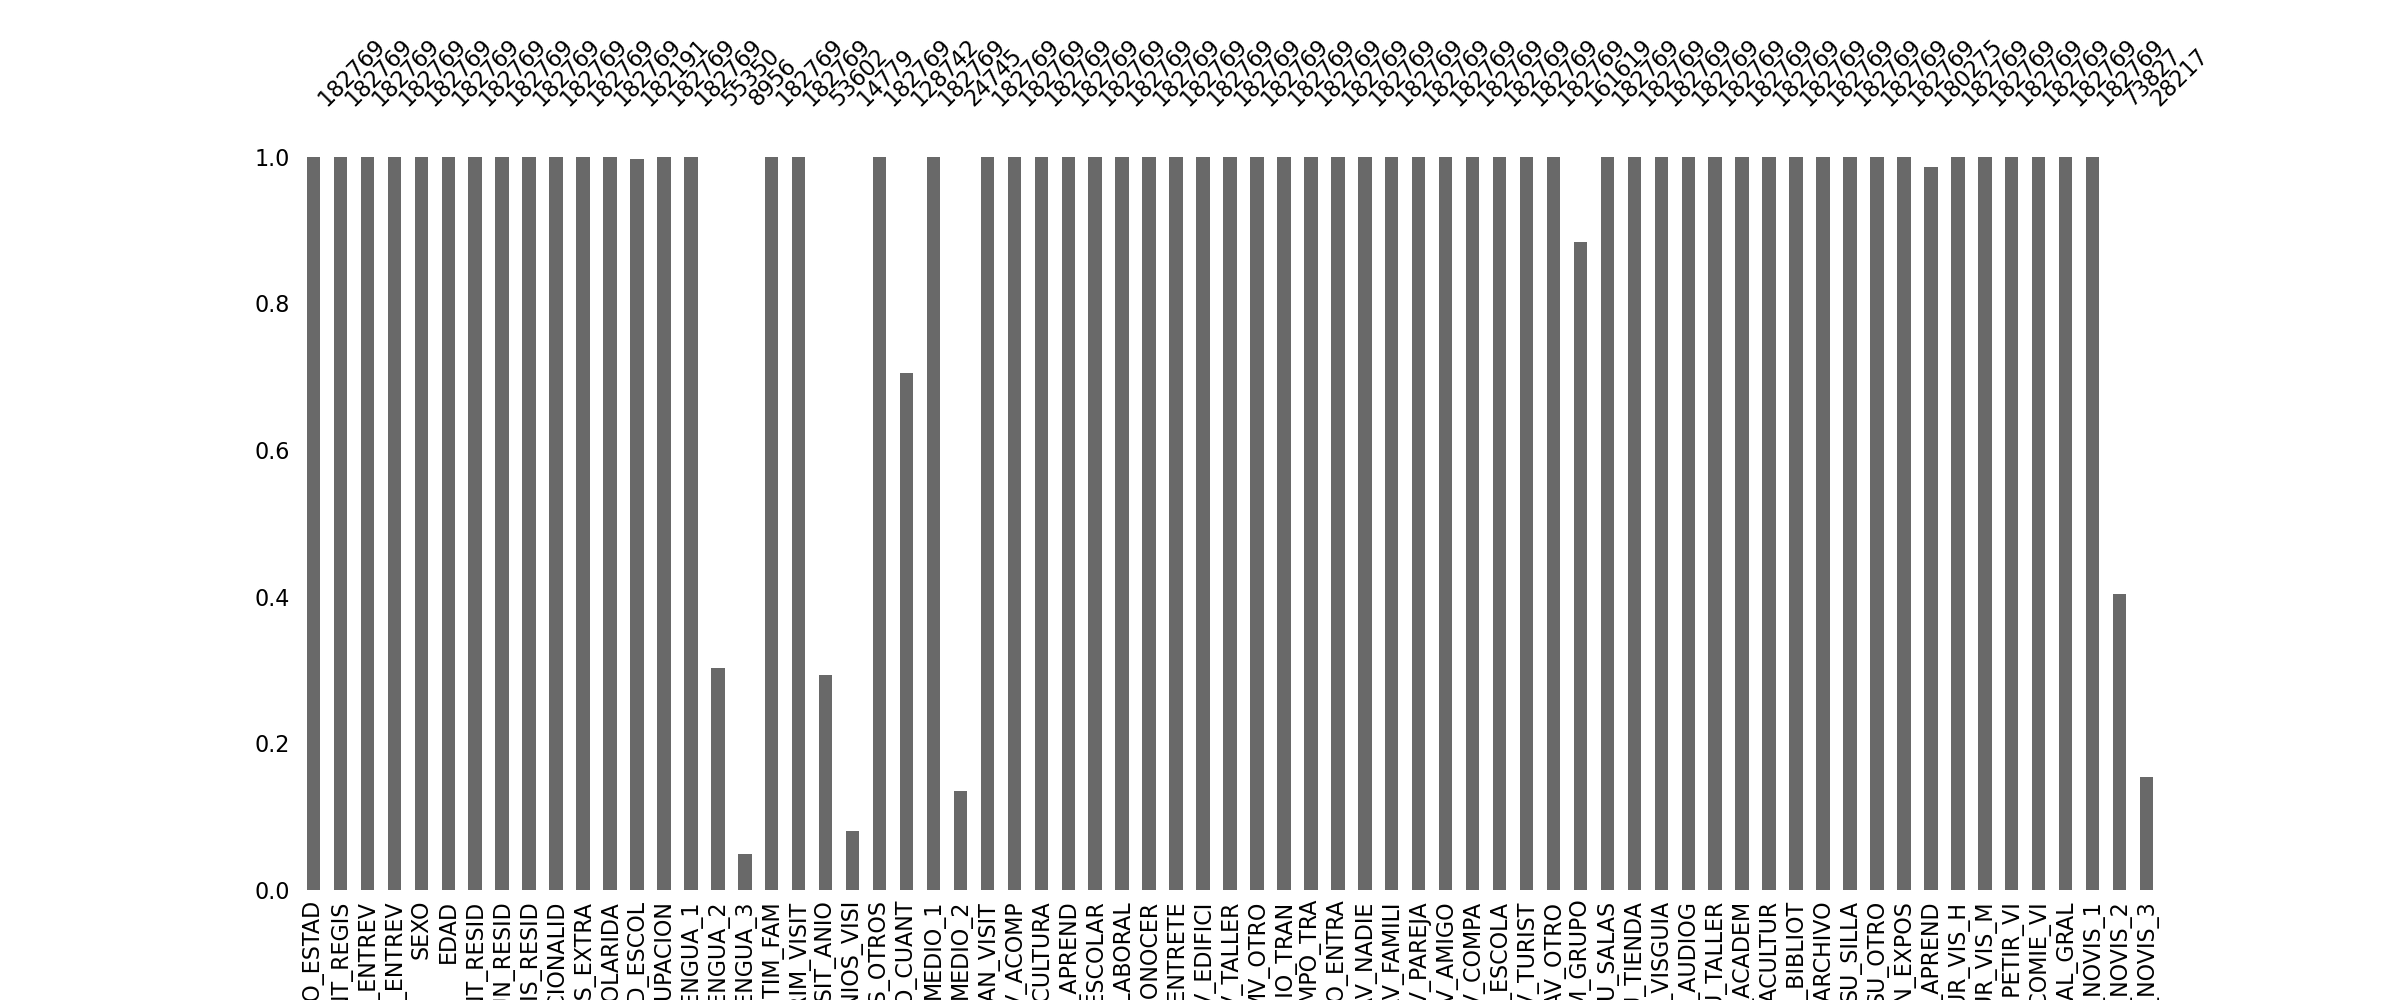

In [13]:
msno.bar(df)

In [14]:
df.columns[df.isnull().any()].tolist()

['COND_ESCOL',
 'LENGUA_2',
 'LENGUA_3',
 'VISIT_ANIO',
 'ANIOS_VISI',
 'VISO_CUANT',
 'MEDIO_2',
 'TAM_GRUPO',
 'NIV_APREND',
 'M_NOVIS_2',
 'M_NOVIS_3']

In [15]:
df = df.drop('COND_ESCOL', 1)
df = df.drop('LENGUA_2', 1)
df = df.drop('LENGUA_3', 1)
df = df.drop('VISIT_ANIO', 1)
df = df.drop('ANIOS_VISI', 1)
df = df.drop('VISO_CUANT', 1)
df = df.drop('MEDIO_2', 1)
df = df.drop('TAM_GRUPO', 1)
df = df.drop('NIV_APREND', 1)
df = df.drop('M_NOVIS_2', 1)
df = df.drop('M_NOVIS_3', 1)

<IPython.core.display.Javascript object>


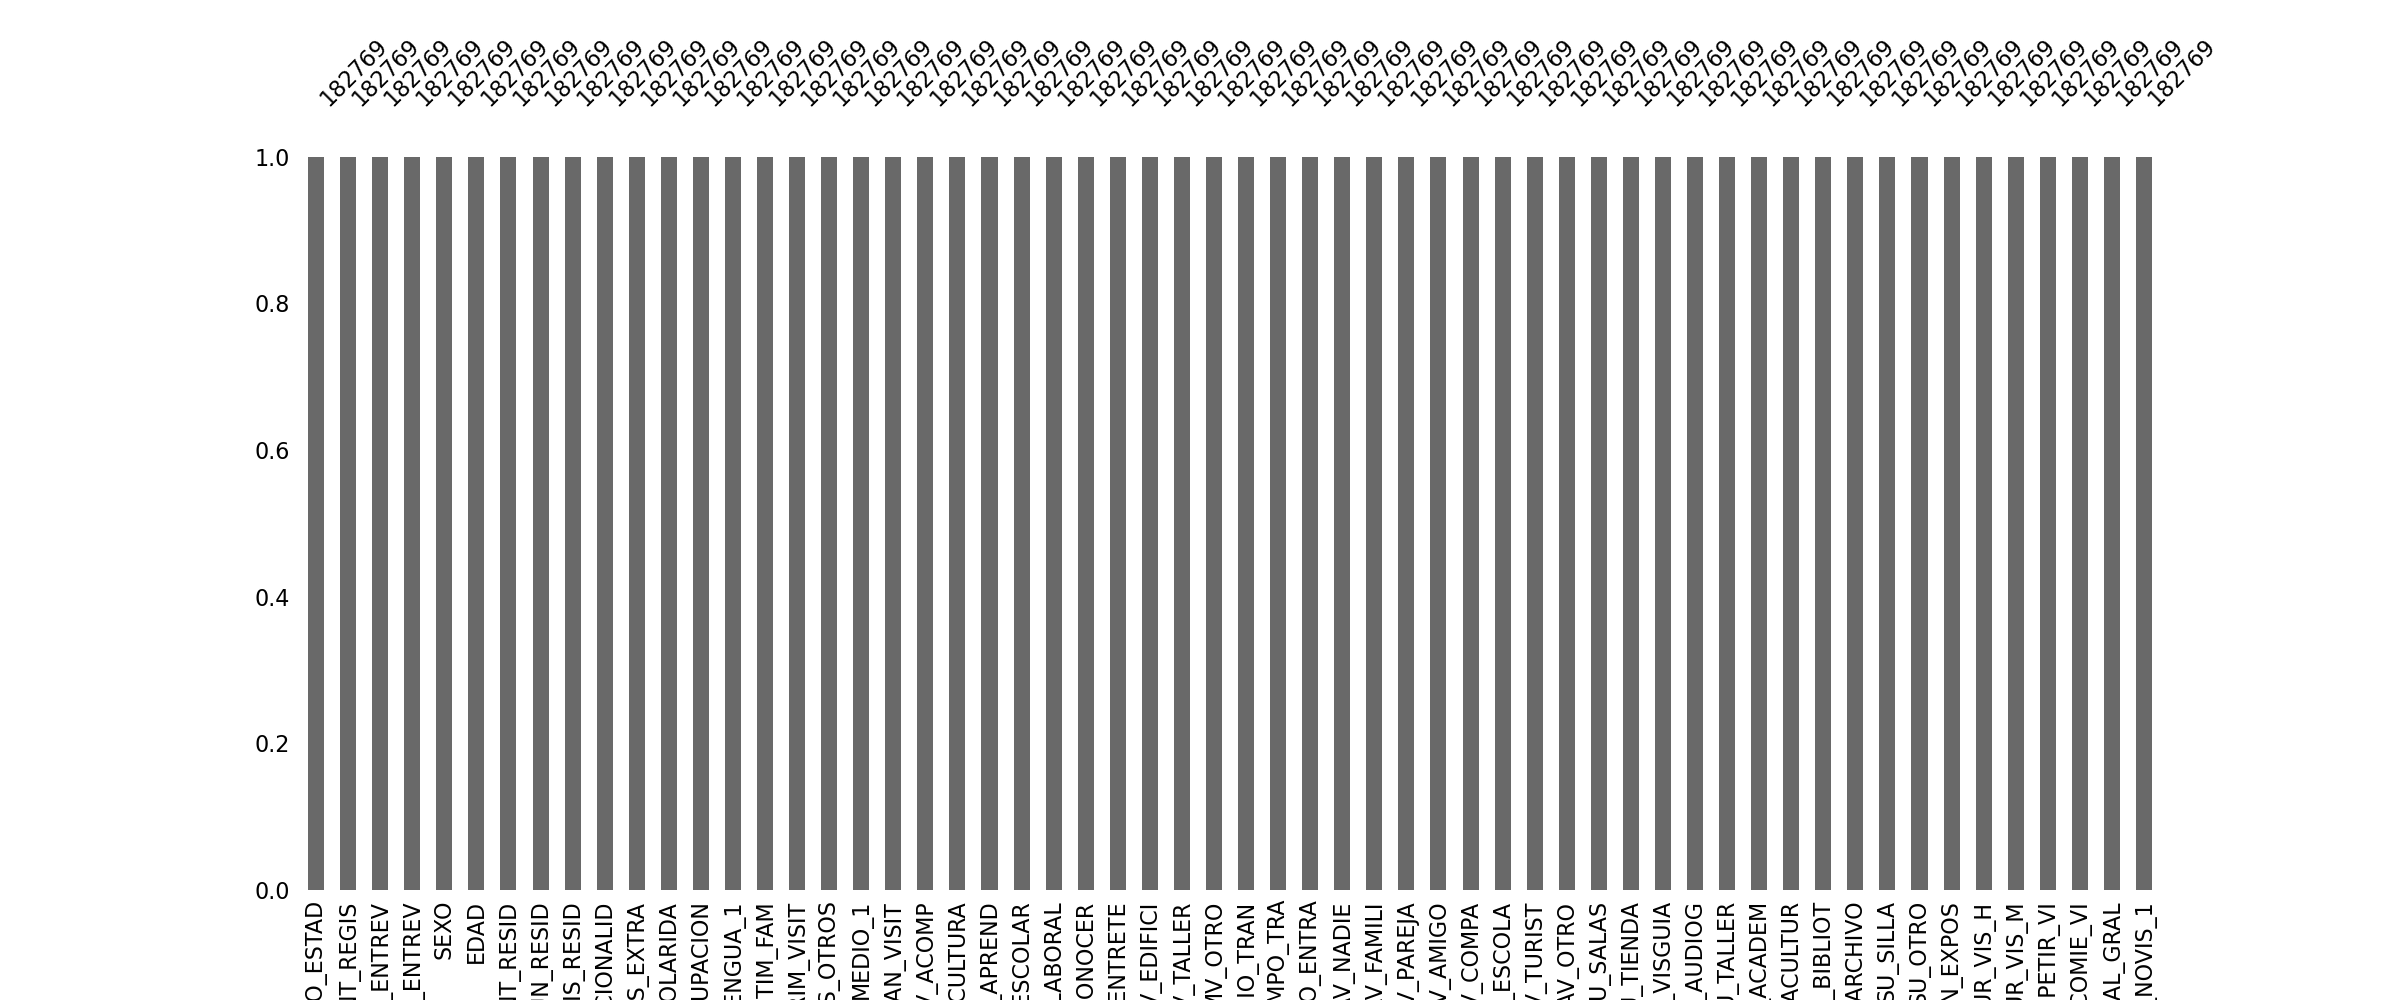

In [16]:
msno.bar(df)

In [17]:
df.columns[df.isnull().any()].tolist()

[]

# Dividir dataset

In [20]:
X = df.drop("SEXO", 1)
y= df["SEXO"]
data = ['ANIO_ESTAD', 'ENT_REGIS', 'MES_ENTREV', 'DIA_ENTREV', 'EDAD',
       'ENT_RESID', 'MUN_RESID', 'PAIS_RESID', 'NACIONALID', 'PAIS_EXTRA',
       'ESCOLARIDA', 'OCUPACION', 'LENGUA_1', 'ESTIM_FAM', 'PRIM_VISIT',
       'VIS_OTROS', 'MEDIO_1', 'PLAN_VISIT', 'MV_ACOMP', 'MV_CULTURA',
       'MV_APREND', 'MV_ESCOLAR', 'MV_LABORAL', 'MV_CONOCER', 'MV_ENTRETE',
       'MV_EDIFICI', 'MV_TALLER', 'MV_OTRO', 'MEDIO_TRAN', 'TIEMPO_TRA',
       'TIPO_ENTRA', 'PAV_NADIE', 'PAV_FAMILI', 'PAV_PAREJA', 'PAV_AMIGO',
       'PAV_COMPA', 'PAV_ESCOLA', 'PAV_TURIST', 'PAV_OTRO', 'SU_SALAS',
       'SU_TIENDA', 'SU_VISGUIA', 'SU_AUDIOG', 'SU_TALLER', 'SU_ACADEM',
       'SU_ACULTUR', 'SU_BIBLIOT', 'SU_ARCHIVO', 'SU_SILLA', 'SU_OTRO',
       'OPIN_EXPOS', 'DUR_VIS_H', 'DUR_VIS_M', 'REPETIR_VI', 'RECOMIE_VI',
       'EVAL_GRAL', 'M_NOVIS_1']
X_centrado = X[data]-X[data].mean(axis=0)

In [21]:
def varianza(var1, var2=None): #si recibe una variable calcula la varianza, si recibe 2 variables calcula la covarianza entre dichas variables
    if var2 is None:
        var2 = var1
    assert var1.shape == var2.shape  #devuelve booleano, si es true continua, si es false para el programa y arroja un error
    var1_mean = var1.mean()
    var2_mean = var2.mean()
    return np.sum((var1 - var1_mean) * (var2 - var2_mean)) / (var1.shape[0] - 1)

In [22]:
import numpy as np
cov_mat = np.cov(m=X_centrado.T)
cov_mat

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  6.25365444e+01,  3.15986148e-02, ...,
        -1.17798842e+00, -8.02143873e-01, -2.10857684e+00],
       [ 0.00000000e+00,  3.15986148e-02,  2.26440233e+00, ...,
        -7.74640760e-02,  3.29064812e-02, -1.49508894e-01],
       ...,
       [ 0.00000000e+00, -1.17798842e+00, -7.74640760e-02, ...,
         7.60158692e+01,  1.34803041e+01,  1.56847254e+01],
       [ 0.00000000e+00, -8.02143873e-01,  3.29064812e-02, ...,
         1.34803041e+01,  2.41327326e+01,  1.61257747e+01],
       [ 0.00000000e+00, -2.10857684e+00, -1.49508894e-01, ...,
         1.56847254e+01,  1.61257747e+01,  6.44687814e+01]])

In [23]:
val_propios, vec_propios = np.linalg.eig(cov_mat)
print('Vectores propios: \n', vec_propios)
print('\nValores propios: \n', val_propios)

Vectores propios: 
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 2.56421600e-03  1.25359124e-03  1.67550958e-04 ... -5.75840666e-05
  -2.43911588e-04  0.00000000e+00]
 [-9.32517512e-05  1.67197356e-04  3.72321343e-04 ...  5.55605760e-04
  -1.12860912e-03  0.00000000e+00]
 ...
 [ 7.12780586e-04 -4.18998208e-04  7.88367220e-04 ...  6.75077358e-05
  -1.44634961e-04  0.00000000e+00]
 [ 1.62544931e-04  4.16615777e-04  3.75439245e-04 ...  4.06438088e-05
   1.04144341e-04  0.00000000e+00]
 [ 6.03312225e-04 -5.25768006e-04  5.82102140e-04 ... -1.27548609e-04
   3.91178729e-05  0.00000000e+00]]

Valores propios: 
 [2.69379625e+04 1.08260187e+04 1.65919452e+03 6.89730184e+02
 2.70590387e+02 2.62253701e+02 1.07098570e+02 9.73061507e+01
 7.51217531e+01 5.44861438e+01 3.91899685e+01 3.57796436e+01
 2.58083239e+01 1.65846680e+01 3.70982341e+00 2.55566370e+00
 2.25344692e+00 8.41983669e-01 7.03218309e-01 5.75056631e-01
 4.41112566e-01 3.7

In [24]:
orden_componentes = np.argsort(val_propios)[::-1]
val_propios_ordenados = val_propios[orden_componentes]
vec_propios_ordenados = vec_propios[orden_componentes]
print('Vectores propios(ordenados): \n', vec_propios_ordenados)
print('\nValores propios(ordenados): \n', val_propios_ordenados)


Vectores propios(ordenados): 
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 2.56421600e-03  1.25359124e-03  1.67550958e-04 ... -5.75840666e-05
  -2.43911588e-04  0.00000000e+00]
 [-9.32517512e-05  1.67197356e-04  3.72321343e-04 ...  5.55605760e-04
  -1.12860912e-03  0.00000000e+00]
 ...
 [-2.58689568e-06  1.97298083e-05  4.11148873e-05 ...  2.52992140e-02
   4.62069428e-02  0.00000000e+00]
 [-2.47957697e-05  7.57633922e-05  8.34140872e-05 ...  1.56335022e-02
   9.41906516e-03  0.00000000e+00]
 [ 6.03312225e-04 -5.25768006e-04  5.82102140e-04 ... -1.27548609e-04
   3.91178729e-05  0.00000000e+00]]

Valores propios(ordenados): 
 [2.69379625e+04 1.08260187e+04 1.65919452e+03 6.89730184e+02
 2.70590387e+02 2.62253701e+02 1.07098570e+02 9.73061507e+01
 7.51217531e+01 5.44861438e+01 3.91899685e+01 3.57796436e+01
 2.58083239e+01 1.65846680e+01 3.70982341e+00 2.55566370e+00
 2.25344692e+00 8.41983669e-01 7.03218309e-01 5.75056631e-

# PCA

In [25]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_centrado)

In [26]:
pca.components_

array([[-3.46716634e-22,  2.56421600e-03, -9.32517512e-05,
         1.42287511e-05,  2.08625244e-03,  1.17020612e-02,
         9.98077695e-01, -4.61313251e-02, -2.76141797e-05,
        -3.88291505e-02,  5.32497078e-04,  6.95648113e-03,
         3.92013835e-05,  8.51274795e-06, -4.10534910e-05,
         8.67931139e-05,  1.03340315e-03,  1.76592279e-05,
        -6.27293971e-06,  7.88533628e-05,  5.51185560e-05,
        -4.91225256e-05,  4.11109756e-06, -2.07127393e-05,
        -1.46845592e-05, -8.73441345e-06, -7.53454508e-06,
         6.96547116e-06,  1.41156772e-04,  5.31593962e-04,
         2.24126959e-06, -8.29073978e-06,  9.51790724e-06,
         1.03093011e-05,  1.38130819e-05,  2.96803340e-06,
        -2.97108677e-05,  7.30859606e-06,  1.16986793e-05,
        -4.12151479e-05,  2.70168350e-05,  2.92519010e-06,
         3.77330643e-06, -2.47957697e-05, -2.58689568e-06,
        -1.55476620e-05, -6.01944433e-06, -4.00506698e-06,
         1.46955340e-06,  2.48883593e-05,  8.07402633e-0

In [27]:
pca.explained_variance_ratio_

array([0.65522592, 0.26332682])

<IPython.core.display.Javascript object>


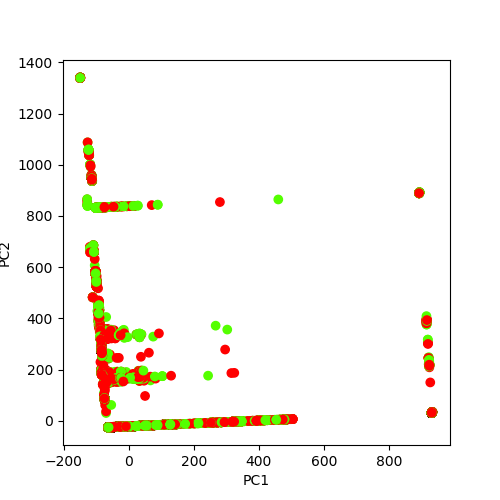

In [28]:
fig = plt.figure(figsize=(5,5))
plt.xlabel("PC1", size = 10)
plt.ylabel("PC2", size = 10)
plt.scatter(X_pca[:,0], X_pca[:,1],c=y, cmap = plt.cm.prism)
plt.show()
